In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from datetime import datetime
import statistics
data_battery = pd.read_csv("./Data/Data.csv")

In [2]:
data_battery.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


In [3]:
data_battery.dtypes

Timestamp                               int64
Current                                 int64
Total voltage                         float64
SOC                                   float64
Temperature                           float64
SOH                                   float64
Equivalent cycle                      float64
Application status                      int64
Grid status                             int64
Grid power                            float64
Grid energy consumption               float64
Grid cumulative energy consumption    float64
dtype: object

In [4]:
data_battery.describe()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
count,3.110400e+04,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,3.110400e+04
mean,1.572253e+12,-0.003858,64.272196,0.828945,27.915732,0.948226,52.563840,0.999968,0.988137,221.494578,61.526272,9.442240e+05
std,8.979096e+09,33.170852,1.918436,0.134033,13.308070,0.019635,31.301743,0.005670,0.108273,299.129090,83.091414,5.556151e+05
min,1.556701e+12,-300.000000,48.160346,-0.155714,20.263275,0.919398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.564477e+12,0.000000,63.700213,0.781742,22.272948,0.932068,24.438458,1.000000,1.000000,0.000000,0.000000,4.466059e+05
50%,1.572253e+12,0.000000,65.299735,0.901914,26.060848,0.945187,52.499507,1.000000,1.000000,0.000000,0.000000,9.466569e+05
75%,1.580028e+12,10.000000,65.344541,0.905029,29.523420,0.963154,77.241660,1.000000,1.000000,617.410545,171.502929,1.386711e+06
max,1.587804e+12,10.000000,66.720000,1.000000,136.118156,1.000000,107.847718,1.000000,1.000000,654.014349,181.670653,1.913713e+06


In [5]:
data_battery['Timestamp'] = pd.to_datetime(data_battery['Timestamp'])

In [6]:
data_battery.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1970-01-01 00:25:56.701215,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1970-01-01 00:25:56.702215,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1970-01-01 00:25:56.703215,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1970-01-01 00:25:56.704215,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1970-01-01 00:25:56.705215,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


In [7]:
data_battery.describe()

,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
count,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,3.110400e+04
mean,-0.003858,64.272196,0.828945,27.915732,0.948226,52.563840,0.999968,0.988137,221.494578,61.526272,9.442240e+05
std,33.170852,1.918436,0.134033,13.308070,0.019635,31.301743,0.005670,0.108273,299.129090,83.091414,5.556151e+05
min,-300.000000,48.160346,-0.155714,20.263275,0.919398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,63.700213,0.781742,22.272948,0.932068,24.438458,1.000000,1.000000,0.000000,0.000000,4.466059e+05
50%,0.000000,65.299735,0.901914,26.060848,0.945187,52.499507,1.000000,1.000000,0.000000,0.000000,9.466569e+05
75%,10.000000,65.344541,0.905029,29.523420,0.963154,77.241660,1.000000,1.000000,617.410545,171.502929,1.386711e+06
max,10.000000,66.720000,1.000000,136.118156,1.000000,107.847718,1.000000,1.000000,654.014349,181.670653,1.913713e+06


# Correlation 
### 1. Grid Status & SOC

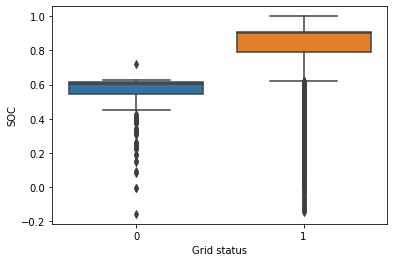

In [8]:
sns.boxplot(x="Grid status", y="SOC", data=data_battery)

In [9]:
print(' ---------------------------------------- Feature : SOC --------------------------------------------')
print('Grid Status 0 : Median : ', statistics.median(data_battery['SOC'][data_battery['Grid status'] == 0]))
print('Grid Status 1 : Median : ', statistics.median(data_battery['SOC'][data_battery['Grid status'] == 1]))


 ---------------------------------------- Feature : SOC --------------------------------------------
Grid Status 0 : Median :  0.604827811
Grid Status 1 : Median :  0.9019939440000001


## Obsevation: 
The following observation can be made

1. SOC is quite high when Grid status is 1 and vice versa.

### 2. Equivalent cycle and SOH

/home/saif/anaconda3/envs/myenv1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


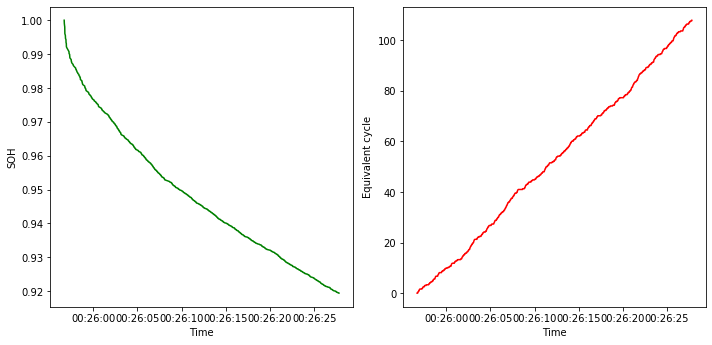

In [10]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(data_battery['Timestamp'], data_battery['SOH'], '-g') 
plt.xlabel('Time')
plt.ylabel('SOH')

plt.subplot(1, 2, 2)
plt.plot(data_battery['Timestamp'], data_battery['Equivalent cycle'], '-r')  
plt.xlabel('Time')
plt.ylabel('Equivalent cycle')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [11]:
print(' ---------------------------------------- Feature : SOH --------------------------------------------')
print('Grid Status 0 : Median : ', statistics.median(data_battery['SOH'][data_battery['Grid status'] == 0]))
print('Grid Status 1 : Median : ', statistics.median(data_battery['SOH'][data_battery['Grid status'] == 1]))
print(' --------------------------------- Feature : Equivalent cycle --------------------------------------------')
print('Grid Status 0 : Median : ', statistics.median(data_battery['Equivalent cycle'][data_battery['Grid status'] == 0]))
print('Grid Status 1 : Median : ', statistics.median(data_battery['Equivalent cycle'][data_battery['Grid status'] == 1]))

 ---------------------------------------- Feature : SOH --------------------------------------------
Grid Status 0 : Median :  0.9448923840000001
Grid Status 1 : Median :  0.9451887809999999
 --------------------------------- Feature : Equivalent cycle --------------------------------------------
Grid Status 0 : Median :  53.05061916
Grid Status 1 : Median :  52.49216013


In [12]:
print(' ---------------------------------------- Feature : SOH --------------------------------------------')
print('Appication Status 0 : Median : ', statistics.median(data_battery['SOH'][data_battery['Application status'] == 0]))
print('Application Status 1 : Median : ', statistics.median(data_battery['SOH'][data_battery['Application status'] == 1]))
print(' --------------------------------- Feature : Equivalent cycle --------------------------------------------')
print('Application Status 0 : Median : ', statistics.median(data_battery['Equivalent cycle'][data_battery['Application status'] == 0]))
print('Application Status 1 : Median : ', statistics.median(data_battery['Equivalent cycle'][data_battery['Application status'] == 1]))

 ---------------------------------------- Feature : SOH --------------------------------------------
Appication Status 0 : Median :  0.9258714659999999
Application Status 1 : Median :  0.945187743
 --------------------------------- Feature : Equivalent cycle --------------------------------------------
Application Status 0 : Median :  92.33779196
Application Status 1 : Median :  52.49705823


## Obsevation: 
The following observation could be made 

1. _SOH_ **deccreases** with respect to time while _Equivalent Cycle_ **increases**.
2. SOH is inversely proportional to Equivalent Cycle
3. SOH and Equvivalent Cycle is independent of Grid Status

### 3. SOC and temperature

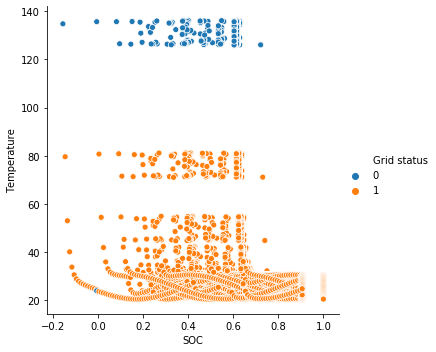

In [13]:
sns.relplot(x="SOC", y="Temperature", hue="Grid status", data=data_battery)

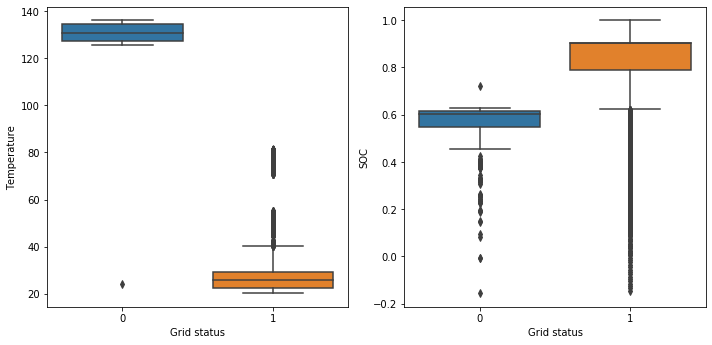

In [14]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x="Grid status", y="Temperature", data=data_battery)
plt.subplot(1, 2, 2)
sns.boxplot(x="Grid status", y="SOC", data=data_battery)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [15]:
print(' --------------------------------- Feature : Temperature --------------------------------------------')
print('Grid Status 0 : Median : ', statistics.median(data_battery['Temperature'][data_battery['Grid status'] == 0]))
print('Grid Status 1 : Median : ', statistics.median(data_battery['Temperature'][data_battery['Grid status'] == 1]))
print(' ---------------------------------------- Feature : SOC --------------------------------------------')
print('Grid Status 0 : Median : ', statistics.median(data_battery['SOC'][data_battery['Grid status'] == 0]))
print('Grid Status 1 : Median : ', statistics.median(data_battery['SOC'][data_battery['Grid status'] == 1]))

 --------------------------------- Feature : Temperature --------------------------------------------
Grid Status 0 : Median :  130.8261069
Grid Status 1 : Median :  25.95955292
 ---------------------------------------- Feature : SOC --------------------------------------------
Grid Status 0 : Median :  0.604827811
Grid Status 1 : Median :  0.9019939440000001


## Obsevation: 
The following observations could be made

1. When **Grid Status** is *1*, the range of temperatures is between 20-80 with median value of 25.95 && SOC is between 0.6 - 1 with median value of 0.91
2. When **Grid Status** is *0*, the range of temperatures is between 120-140 with  median value of 130.9 && SOC is between 0.4 - 0.6 with median value of 0.60
3. SOC is inversely proportional to Temperature

## Correlation Matrix of four feature

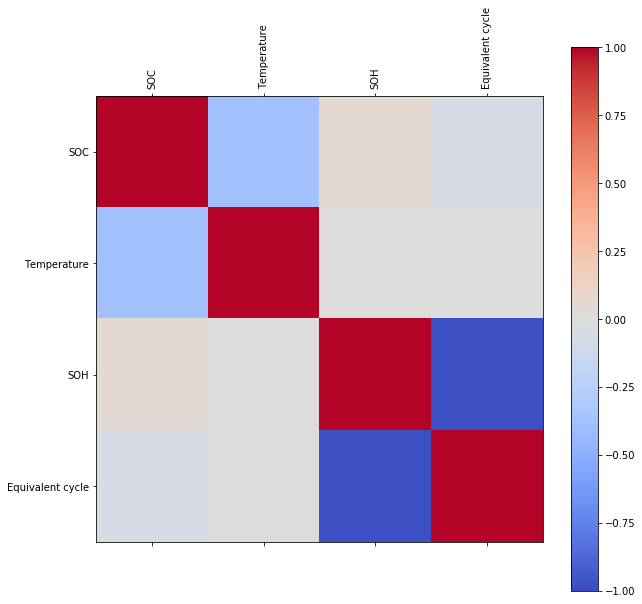

                       SOC  Temperature       SOH  Equivalent cycle
SOC               1.000000    -0.369040  0.054005         -0.053320
Temperature      -0.369040     1.000000  0.003684         -0.004896
SOH               0.054005     0.003684  1.000000         -0.984262
Equivalent cycle -0.053320    -0.004896 -0.984262          1.000000


In [16]:
data1 = data_battery.copy()
data1 = data1.drop(['Application status', 'Grid status', 'Timestamp', 'Current', 'Total voltage',
                    'Grid power', 'Grid energy consumption', 'Grid cumulative energy consumption'], axis=1)
# correaltion matrix
corr = data1.corr()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data1.columns)
ax.set_yticklabels(data1.columns)
plt.show()

print(corr)

## Observation

1.  **Equivalent cycle Vs SOH**: They are higly negatively correlated with each other.
2.  **Temperature Vs SOC** : They are negatively correlated with each other.

# Visualizing the four features

Plotting the data to visualize their distribution:

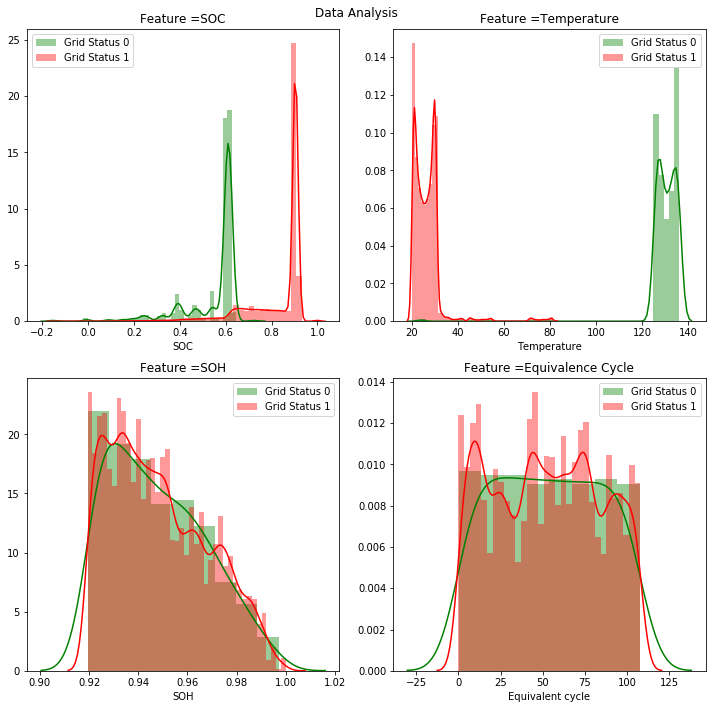

In [17]:
feature_str = ['SOC', 'Temperature', 'SOH', 'Equivalence Cycle']
fig = plt.figure(figsize=(10, 10))
j = 0
for i in data1.columns:
    plt.subplot(2, 2, j+1)
    sns.distplot(data1[i][data_battery['Grid status'] == 0], color='g', label='Grid Status 0')
    sns.distplot(data1[i][data_battery['Grid status'] == 1], color='r', label='Grid Status 1')
    plt.title('Feature =%s' % feature_str[j])
    # plt.title('Feature A : ', temp0)
    plt.legend(loc='best')
    j +=1
fig.suptitle('Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()